In [210]:
from glob import glob

import numpy as np
import pandas as pd
import thicket as th

import matplotlib.pyplot as plt

# pip install numpy pandas matplotlib llnl-thicket seaborn


In [ ]:
tk = th.Thicket.from_caliperreader("cali")

(1/2) Reading Files:  27%|██▋       | 67/250 [00:02<00:06, 30.21it/s]

In [ ]:
print(tk.tree(metric_column='Total time'))

In [168]:
tk.metadata_column_to_perfdata("input_type")
input_types = sorted(tk.metadata["input_type"].unique())
tk.metadata_column_to_perfdata("input_size")
input_sizes = sorted(tk.metadata["input_size"].unique())
tk.metadata_column_to_perfdata("num_procs")
num_procs = sorted(tk.metadata["num_procs"].unique())

tk.metadata_column_to_perfdata("whole_computation")

tk.dataframe = tk.dataframe.reset_index().set_index(["input_type", "input_size", "num_procs", "whole_computation"]).sort_index()


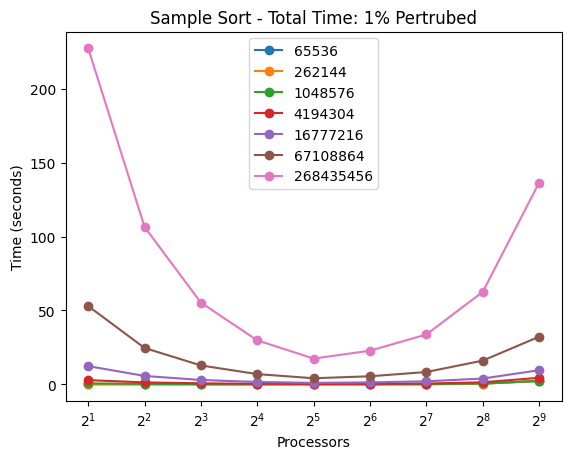

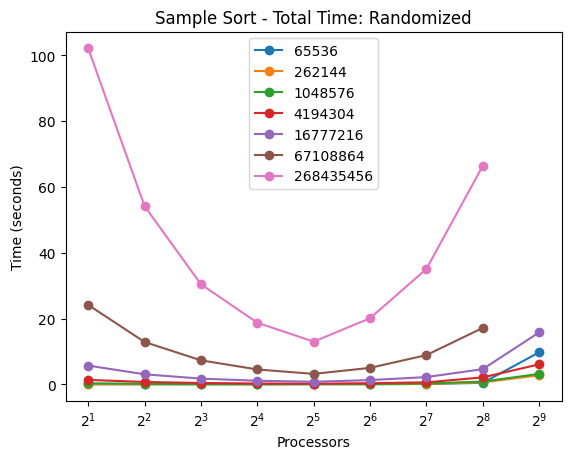

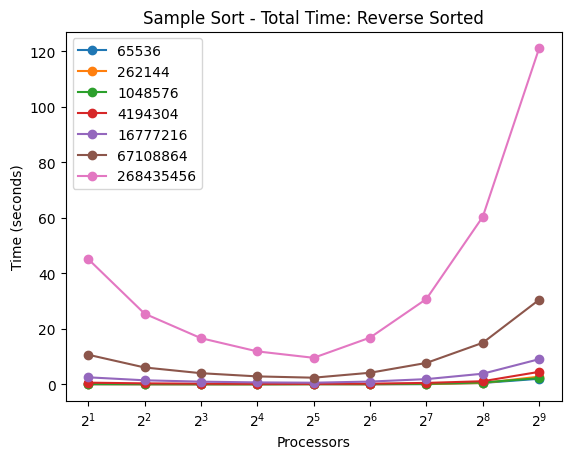

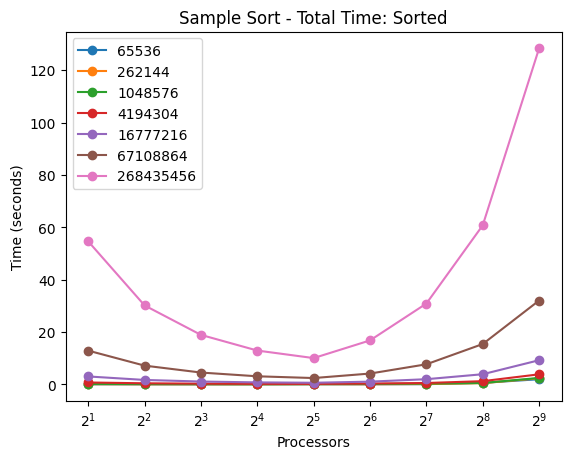

In [205]:
for input_type in input_types:
    data = tk.dataframe.xs((input_type), level=('input_type'))

    titles = {
        "Sorted" : "Sorted", 
        "1_perc_perturbed": "1% Pertrubed", 
        "Random" : "Randomized", 
        "ReverseSorted" : "Reverse Sorted"
    }

    x = num_procs
    y_whole_computation = {input_size: [] for input_size in input_sizes}

    for input_size in input_sizes:
        l1 = data["Total time"][input_size]
        for num_proc in num_procs:
            try:
                l2 = l1[num_proc]
                y_whole_computation[input_size].append(l2.index[0])
            except KeyError:
                y_whole_computation[input_size].append(None)

    plt.figure()
    for input_size in input_sizes:
         plt.plot(x, y_whole_computation[input_size], label=input_size, marker='o')
    plt.xticks(x)
    plt.xscale('log', base=2)
    plt.legend()
    plt.xlabel('Processors')
    plt.ylabel('Time (seconds)')
    plt.title("Sample Sort - Total Time: " + titles[input_type])
    plt.savefig('./plots/Sample Sort - Total Time ' + titles[input_type] + '.png')
    plt.show()
    





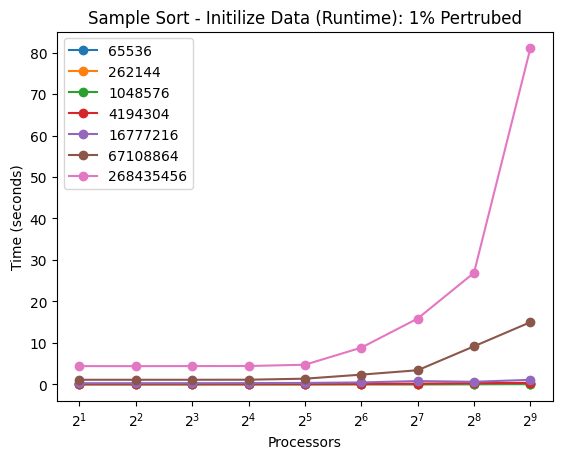

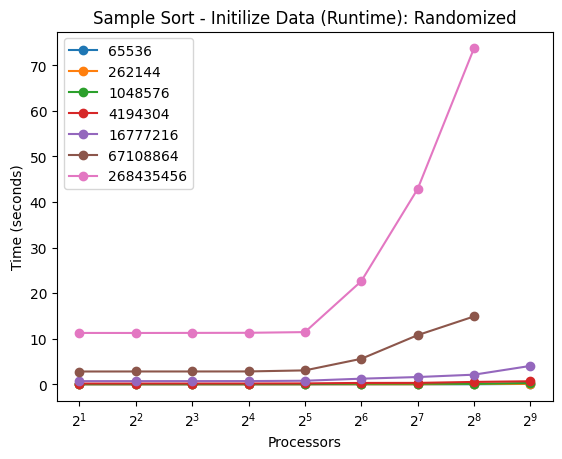

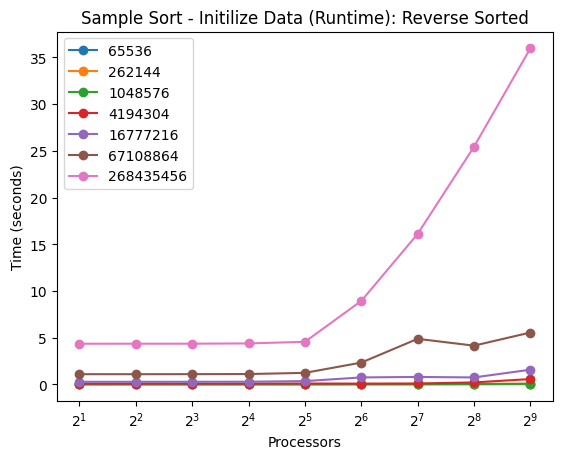

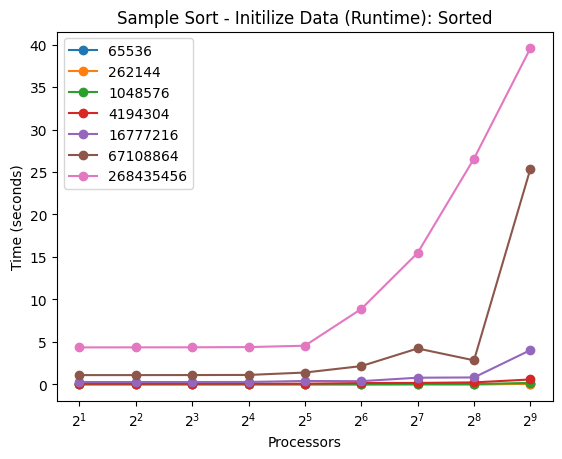

In [206]:
for input_type in input_types:
    data = tk.dataframe.loc[tk.dataframe['name'] == 'data_init_runtime']
    data = data.xs((input_type), level=('input_type'))

    titles = {
        "Sorted" : "Sorted", 
        "1_perc_perturbed": "1% Pertrubed", 
        "Random" : "Randomized", 
        "ReverseSorted" : "Reverse Sorted"
    }

    x = num_procs
    y_data_init_runtime = {input_size: [] for input_size in input_sizes}

    for input_size in input_sizes:
        for num_proc in num_procs:
            try:
                l1 = data.xs((input_size), level=('input_size'))
                l2 = l1.xs((num_proc), level=('num_procs'))
                value = l2["Total time"].tolist()
                y_data_init_runtime[input_size].append(value[0])
            except KeyError:
                y_data_init_runtime[input_size].append(None)
                
    plt.figure()
    for input_size in input_sizes:
         plt.plot(x, y_data_init_runtime[input_size], label=input_size, marker='o')
    plt.xticks(x)
    plt.xscale('log', base=2)
    plt.legend()
    plt.xlabel('Processors')
    plt.ylabel('Time (seconds)')
    plt.title("Sample Sort - Initilize Data (Runtime): " + titles[input_type])
    plt.savefig('./plots/Sample Sort - Initilize Data (Runtime) ' + titles[input_type] + '.png')
    plt.show()
  



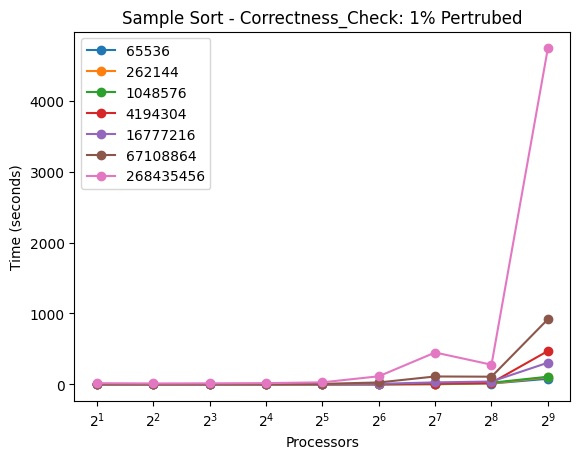

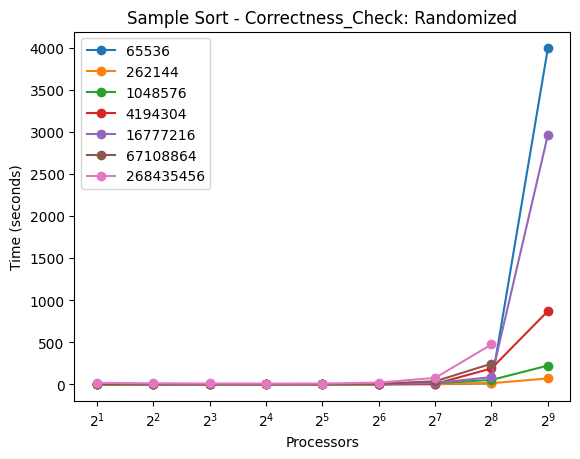

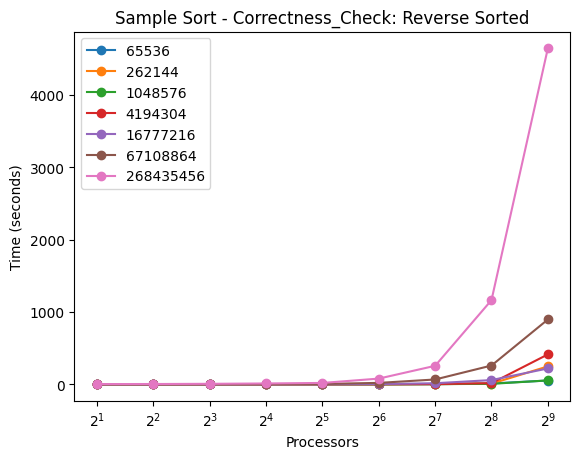

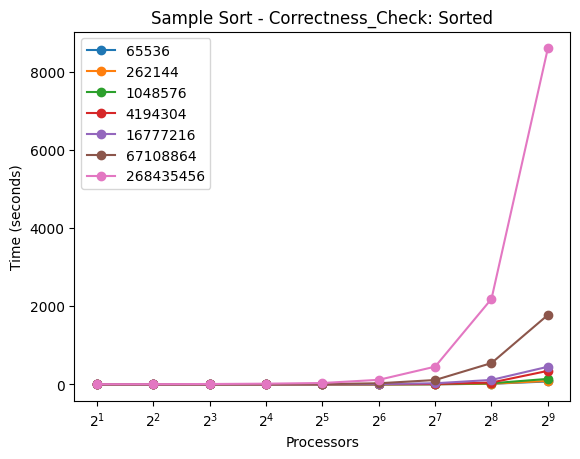

In [207]:
for input_type in input_types:
    data = tk.dataframe.loc[tk.dataframe['name'] == 'correctness_check']
    data = data.xs((input_type), level=('input_type'))

    titles = {
        "Sorted" : "Sorted", 
        "1_perc_perturbed": "1% Pertrubed", 
        "Random" : "Randomized", 
        "ReverseSorted" : "Reverse Sorted"
    }

    x = num_procs
    y_data_init_runtime = {input_size: [] for input_size in input_sizes}

    for input_size in input_sizes:
        for num_proc in num_procs:
            try:
                l1 = data.xs((input_size), level=('input_size'))
                l2 = l1.xs((num_proc), level=('num_procs'))
                value = l2["Total time"].tolist()
                y_data_init_runtime[input_size].append(value[0])
            except KeyError:
                y_data_init_runtime[input_size].append(None)
                
    plt.figure()
    for input_size in input_sizes:
         plt.plot(x, y_data_init_runtime[input_size], label=input_size, marker='o')
    plt.xticks(x)
    plt.xscale('log', base=2)
    plt.legend()
    plt.xlabel('Processors')
    plt.ylabel('Time (seconds)')
    plt.title("Sample Sort - Correctness Check: " + titles[input_type])
    plt.savefig('./plots/Sample Sort - Correctness Check ' + titles[input_type] + '.png')
    plt.show()
  



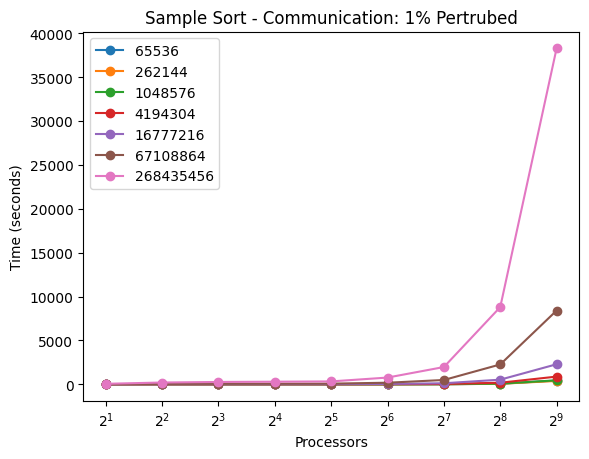

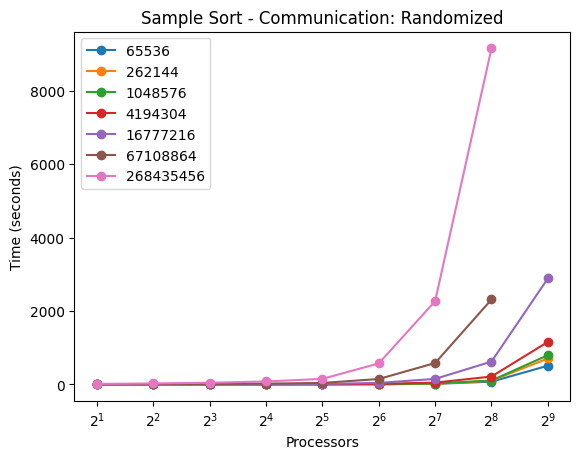

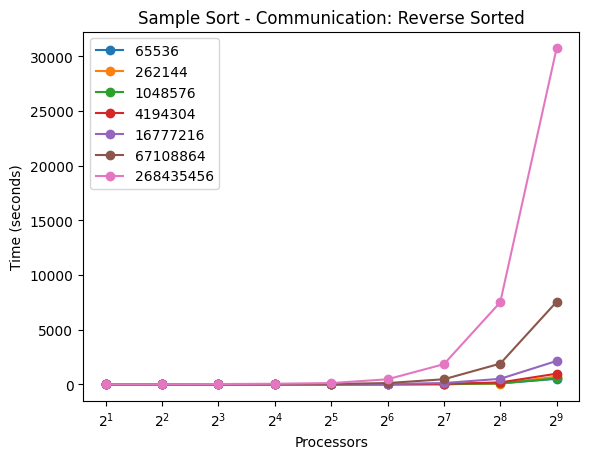

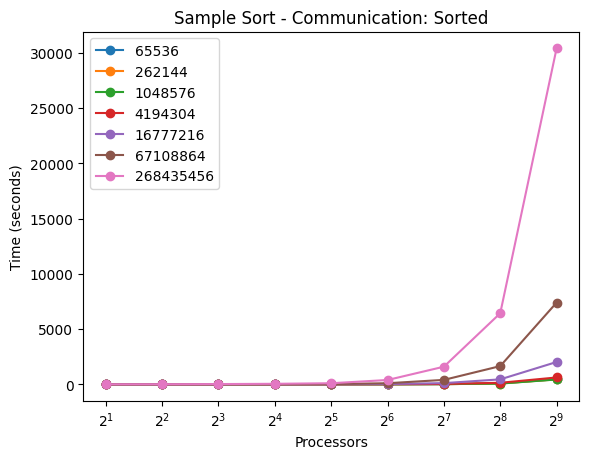

In [208]:
for input_type in input_types:
    data = tk.dataframe.loc[tk.dataframe['name'] == 'comm']
    data = data.xs((input_type), level=('input_type'))

    titles = {
        "Sorted" : "Sorted", 
        "1_perc_perturbed": "1% Pertrubed", 
        "Random" : "Randomized", 
        "ReverseSorted" : "Reverse Sorted"
    }

    x = num_procs
    y_data_init_runtime = {input_size: [] for input_size in input_sizes}

    for input_size in input_sizes:
        for num_proc in num_procs:
            try:
                l1 = data.xs((input_size), level=('input_size'))
                l2 = l1.xs((num_proc), level=('num_procs'))
                value = l2["Total time"].tolist()
                y_data_init_runtime[input_size].append(value[0])
            except KeyError:
                y_data_init_runtime[input_size].append(None)
                
    plt.figure()
    for input_size in input_sizes:
         plt.plot(x, y_data_init_runtime[input_size], label=input_size, marker='o')
    plt.xticks(x)
    plt.xscale('log', base=2)
    plt.legend()
    plt.xlabel('Processors')
    plt.ylabel('Time (seconds)')
    plt.title("Sample Sort - Communication: " + titles[input_type])
    plt.savefig('./plots/Sample Sort - Communication ' + titles[input_type] + '.png')
    plt.show()
  



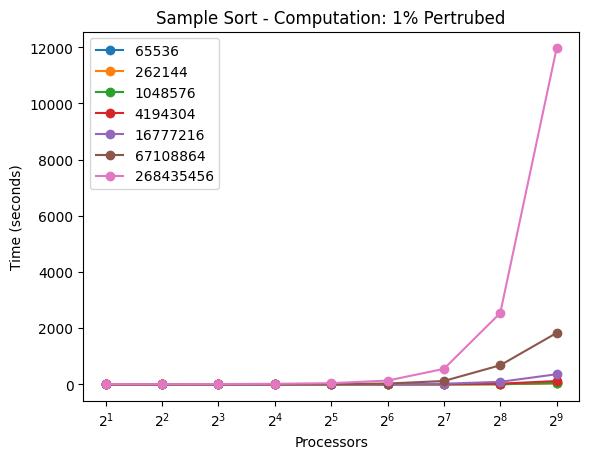

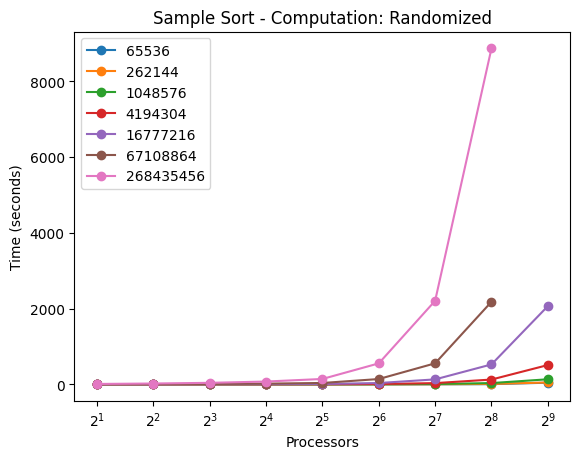

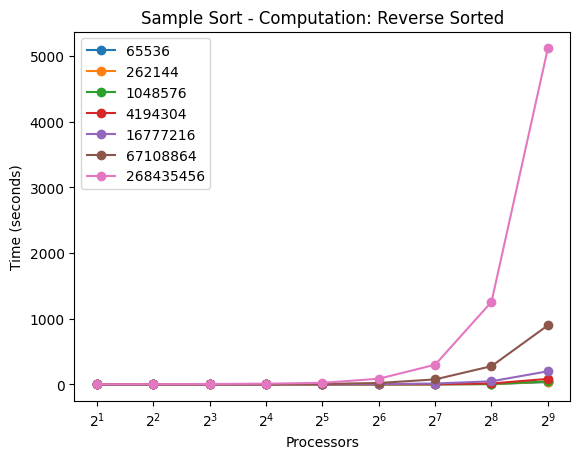

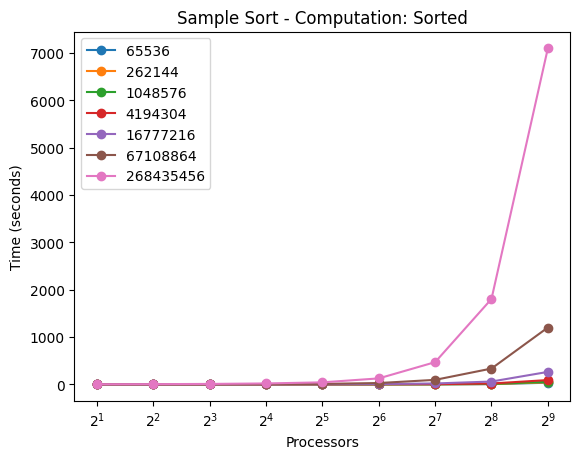

In [209]:
for input_type in input_types:
    data = tk.dataframe.loc[tk.dataframe['name'] == 'comp']
    data = data.xs((input_type), level=('input_type'))

    titles = {
        "Sorted" : "Sorted", 
        "1_perc_perturbed": "1% Pertrubed", 
        "Random" : "Randomized", 
        "ReverseSorted" : "Reverse Sorted"
    }

    x = num_procs
    y_data_init_runtime = {input_size: [] for input_size in input_sizes}

    for input_size in input_sizes:
        for num_proc in num_procs:
            try:
                l1 = data.xs((input_size), level=('input_size'))
                l2 = l1.xs((num_proc), level=('num_procs'))
                value = l2["Total time"].tolist()
                y_data_init_runtime[input_size].append(value[0])
            except KeyError:
                y_data_init_runtime[input_size].append(None)
                
    plt.figure()
    for input_size in input_sizes:
         plt.plot(x, y_data_init_runtime[input_size], label=input_size, marker='o')
    plt.xticks(x)
    plt.xscale('log', base=2)
    plt.legend()
    plt.xlabel('Processors')
    plt.ylabel('Time (seconds)')
    plt.title("Sample Sort - Computation: " + titles[input_type])
    plt.savefig('./plots/Sample Sort - Computation ' + titles[input_type] + '.png')
    plt.show()
  

